In [1]:
import numpy as np
import matplotlib.pyplot as plt

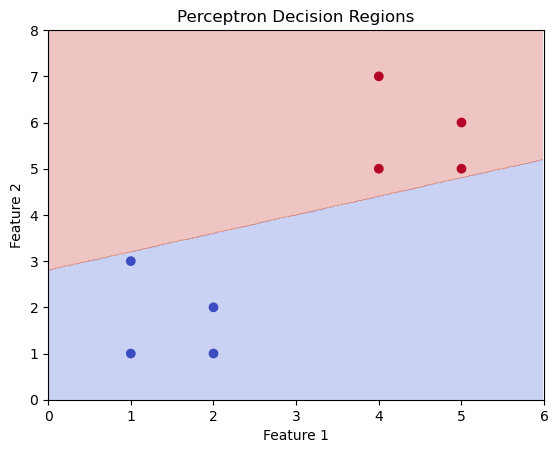

In [2]:
class Perceptron:
    def __init__(self, input_size):
        self.weights = np.zeros(input_size)
        self.bias = 0
        
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return np.where(summation >= 0, 1, 0)
    
    def train(self, inputs, labels, learning_rate, epochs):
        for epoch in range(epochs):
            for input, label in zip(inputs, labels):
                prediction = self.predict(input)
                self.weights += learning_rate * (label - prediction) * input
                self.bias += learning_rate * (label - prediction)
                
X = np.array([[1,1],[2,1],[2,2],[1,3],[4,5],[5,5],[5,6],[4,7]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

perceptron = Perceptron(input_size=2)
learning_rate = 0.1
epochs = 1000
perceptron.train(X, y, learning_rate, epochs)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy , Z, alpha = 0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('Perceptron Decision Regions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()